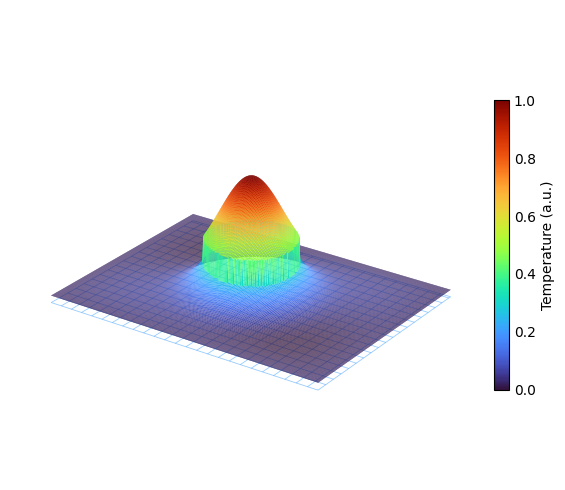

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# --- Domain & resolution ---
Lx, Ly = 40.0, 30.0       # plate size (arbitrary units)
nx, ny = 300, 220         # increase for smoother surface

x = np.linspace(-Lx/2, Lx/2, nx)
y = np.linspace(-Ly/2, Ly/2, ny)
X, Y = np.meshgrid(x, y)

# --- "Part" & hot region ---
R_part = 6.0              # radius of cylindrical part (disc) on the plate
H_part = 2.5              # height of the part
r = np.sqrt(X**2 + Y**2)
part = H_part * (r <= R_part).astype(float)  # cylindrical hub

# Gaussian hot spot (laser heating)
A = 10.0                  # amplitude
sigma = 4.0               # width
hot = A * np.exp(-((X - 0.0)**2 + (Y - 0.0)**2) / (2 * sigma**2))

# Gentle base warp for aesthetics (looks more "simulated")
base_warp = 0.3 * np.sin(2*np.pi*X/Lx) * np.sin(2*np.pi*Y/Ly)

# Final "temperature" field
Z = base_warp + part + hot
Znorm = (Z - Z.min()) / (Z.max() - Z.min())

# --- Plot ---
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# Surface with colormap
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       cmap='turbo', linewidth=0, antialiased=True,
                       shade=True)

# Flat base wireframe (FEM-like grid)
ax.plot_wireframe(X, Y, X*0 + Y*0 + (Z.min()-0.5), rstride=12, cstride=12,
                  color=(0.2, 0.6, 1.0, 0.5), linewidth=0.6)

# Camera/view
ax.view_init(elev=25, azim=-55)

# Clean poster look
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.set_box_aspect((Lx, Ly, (Z.max()-Z.min())*1.2))
for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
    axis.pane.set_alpha(0.0)
    axis.line.set_alpha(0.0)

# Colorbar
m = matplotlib.cm.ScalarMappable(cmap='turbo')
m.set_array(Znorm)
cbar = plt.colorbar(m, ax=ax, fraction=0.02, pad=0.02, shrink=0.8)
cbar.set_label("Temperature (a.u.)")
cbar.ax.tick_params(size=0)

plt.tight_layout()
plt.savefig("fem_style_simulation.svg", format="svg", transparent=True,
            bbox_inches="tight", pad_inches=0.02)
plt.savefig("fem_style_simulation.png", dpi=300, transparent=True,
            bbox_inches="tight", pad_inches=0.02)
plt.show()

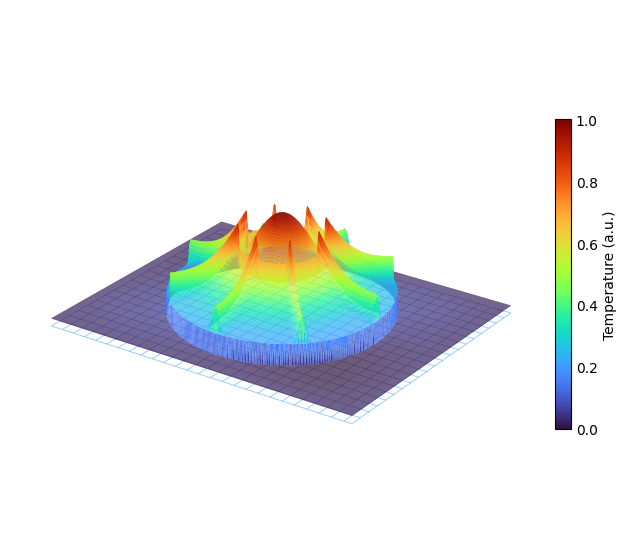

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# -------- Domain & grid --------
Lx, Ly = 50.0, 40.0        # plate size (arbitrary units)
nx, ny = 360, 280          # grid resolution (increase for smoother surface)

x = np.linspace(-Lx/2, Lx/2, nx)
y = np.linspace(-Ly/2, Ly/2, ny)
X, Y = np.meshgrid(x, y)

# Polar coordinates
R = np.hypot(X, Y)
Theta = np.arctan2(Y, X)

# -------- Geometry: annular ring + radial blades --------
R_inner = 6.0              # inner radius (hole)
R_outer = 16.0             # outer radius (ring)
H_ring  = 2.5              # ring height

ring_mask = (R >= R_inner) & (R <= R_outer)

# Blades: angular modulation repeated N_blades times
N_blades  = 8
blade_amp = 3.0            # blade height
sharpness = 12             # larger -> thinner/sharper blades
blade_field = np.maximum(0.0, np.cos(N_blades * Theta)) ** sharpness
blade_mask  = (R >= R_inner) & (R <= R_outer * 0.98)
blades = blade_amp * blade_field * blade_mask

# Combine part height
part_height = H_ring * ring_mask + blades

# -------- “Temperature” field (for coloring) --------
A = 12.0                   # hotspot amplitude
sigma = 5.0                # hotspot width
hot = A * np.exp(-(X**2 + Y**2) / (2 * sigma**2))    # central heat source

# Mild base warp for a more "simulated" look (purely aesthetic)
base_warp = 0.25 * np.sin(2*np.pi*X/Lx) * np.sin(2*np.pi*Y/Ly)

# Final field
Z = base_warp + part_height + hot
Znorm = (Z - Z.min()) / (Z.max() - Z.min())

# -------- Plot --------
fig = plt.figure(figsize=(8.5, 5.6))
ax = fig.add_subplot(111, projection="3d")

# Colored surface
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       cmap="turbo", linewidth=0, antialiased=True, shade=True)

# Flat wireframe plate (FEM-like mesh)
z_plate = Z.min() - 0.7
ax.plot_wireframe(X, Y, X*0 + z_plate, rstride=14, cstride=14,
                  color=(0.2, 0.6, 1.0, 0.55), linewidth=0.6)

# Camera/view & aspect
ax.view_init(elev=25, azim=-55)
ax.set_box_aspect((Lx, Ly, (Z.max() - Z.min()) * 1.2))

# Clean poster look
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.set_xlabel(""); ax.set_ylabel(""); ax.set_zlabel("")
for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
    axis.pane.set_alpha(0.0); axis.line.set_alpha(0.0)

# Colorbar
m = matplotlib.cm.ScalarMappable(cmap="turbo")
m.set_array(Znorm)
cbar = plt.colorbar(m, ax=ax, fraction=0.02, pad=0.02, shrink=0.8)
cbar.set_label("Temperature (a.u.)")
cbar.ax.tick_params(size=0)

plt.tight_layout()
plt.savefig("annular_blades_simulation.svg", format="svg", transparent=True,
            bbox_inches="tight", pad_inches=0.02)
plt.savefig("annular_blades_simulation.png", dpi=300, transparent=True,
            bbox_inches="tight", pad_inches=0.02)
plt.show()

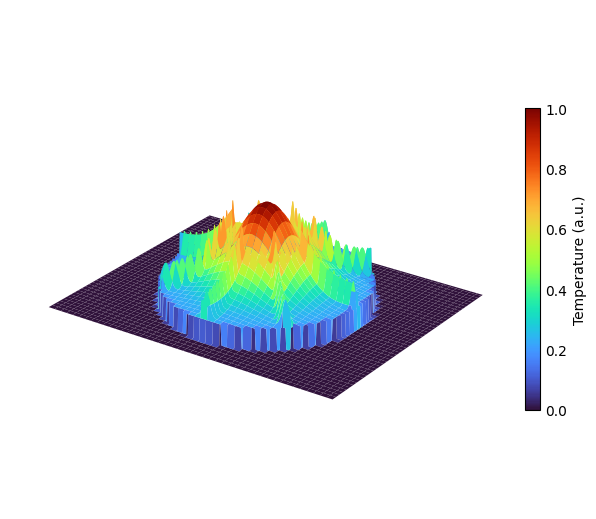

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Domain
Lx, Ly = 50.0, 40.0
nx, ny = 360, 280
x = np.linspace(-Lx/2, Lx/2, nx)
y = np.linspace(-Ly/2, Ly/2, ny)
X, Y = np.meshgrid(x, y)
R = np.hypot(X, Y)
Theta = np.arctan2(Y, X)

# Geometry: annular ring + blades
R_inner, R_outer, H_ring = 6.0, 16.0, 2.5
N_blades, blade_amp, sharpness = 8, 3.0, 12
ring_mask = (R >= R_inner) & (R <= R_outer)
blade_field = np.maximum(0.0, np.cos(N_blades * Theta)) ** sharpness
blade_mask = (R >= R_inner) & (R <= R_outer * 0.98)
blades = blade_amp * blade_field * blade_mask
part_height = H_ring * ring_mask + blades

# Temperature field (for color)
A, sigma = 12.0, 5.0
hot = A * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
Z = part_height + hot

# --- PLOT (just geometry, no extras) ---
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, Z, cmap="turbo", linewidth=0, antialiased=True, shade=True)
ax.view_init(elev=25, azim=-55)
ax.set_box_aspect((Lx, Ly, (Z.max() - Z.min()) * 1.2))

# Remove everything for a clean export
ax.axis("off")
ax.grid(False)
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])

for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
    axis.pane.set_alpha(0.0)
    axis.line.set_alpha(0.0)

# Colorbar
m = matplotlib.cm.ScalarMappable(cmap="turbo")
m.set_array(Znorm)
cbar = plt.colorbar(m, ax=ax, fraction=0.02, pad=0.02, shrink=0.8)
cbar.set_label("Temperature (a.u.)")
cbar.ax.tick_params(size=0)

plt.tight_layout(pad=0)
plt.savefig("annular_blades_clean.svg", format="svg", transparent=True,
            bbox_inches="tight", pad_inches=0)
plt.show()